<a href="https://colab.research.google.com/github/chimaOkwuokei/ISEND-PAU/blob/main/faster_rcnn_implementation_of_punctual_defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1374, done.
remote: Counting objects: 100% (471/471), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 1374 (delta 349), reused 350 (delta 302), pack-reused 903
Receiving objects: 100% (1374/1374), 12.83 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (931/931), done.


In [1]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [2]:
# Install the Requirements
!pip install -r requirements.txt

In [3]:
!unzip -q ../train_data_defects.zip -d custom_data

In [4]:

%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train_data_defects/images/train'
TRAIN_DIR_LABELS: 'custom_data/train_data_defects/labels/train'
VALID_DIR_IMAGES: 'custom_data/train_data_defects/images/val'
VALID_DIR_LABELS: 'custom_data/train_data_defects/labels/val'

# Class names.
CLASSES: [
    '__background__',
    'cracks', 'incrust'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 3

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [15]:
!python train.py --data data_configs/custom_data.yaml --epochs 50 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 2
#0d7fc225d60e8c0f8ca2a8870971557bb2801693

2024-07-17 16:11:48.730340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 16:11:48.730385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 16:11:48.731815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 16:11:48.739321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 16:11:49.778898: W tensorflow/compiler/tf2

In [27]:
!python inference.py --input /content/Slivers0.jpg --weights outputs/training/custom_training/best_model.pth
#get count and area calculation

2024-07-17 16:44:50.779184: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 16:44:50.779234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 16:44:50.780544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 16:44:50.788085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 16:44:51.896045: W tensorflow/compiler/tf2

In [9]:
import matplotlib.pyplot as plt
import glob as glob

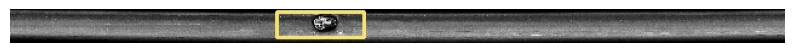

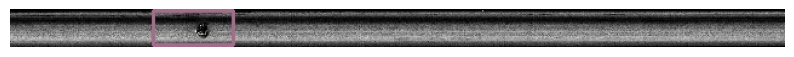

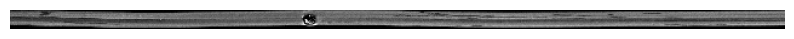

In [18]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [16]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2024-07-17 16:17:30.964553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 16:17:30.964608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 16:17:30.965925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 16:17:30.973099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 16:17:32.151706: W tensorflow/compiler/tf2

In [28]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2024-07-17 16:54:44.553440: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 16:54:44.553494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 16:54:44.554826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 16:54:44.561947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 16:54:45.746114: W tensorflow/compiler/tf2